In [1]:
from helpers import *
# import shap

In [2]:
goi_id = getGOI()

_, X_log, y_log, X_log_train, X_log_test, _, _ = getProcessedData(goi_id)

_, _, X_test_corr = getCorrAndHighCorrFeatures(X_log, y_log, X_log_train, X_log_test)

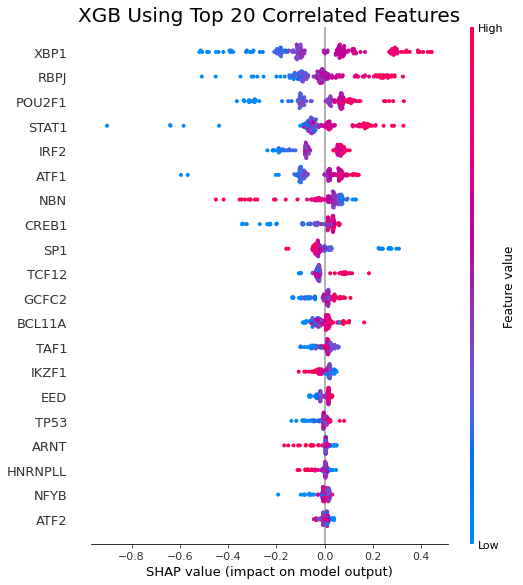

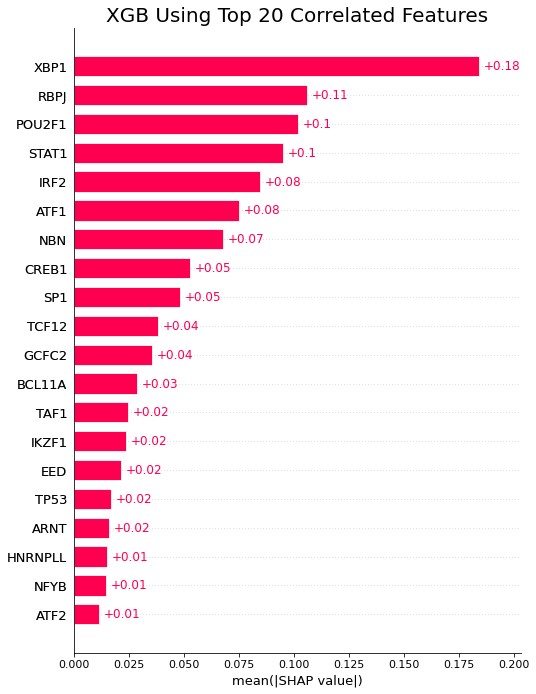

In [3]:
#corrxgb
shapPlots("../models/XGB_TOP20_CORR_PARAMS", "XGB Using Top 20 Correlated Features", X_test_corr)

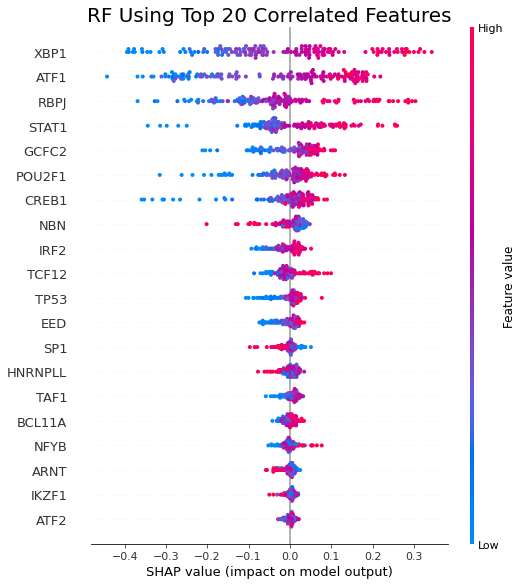

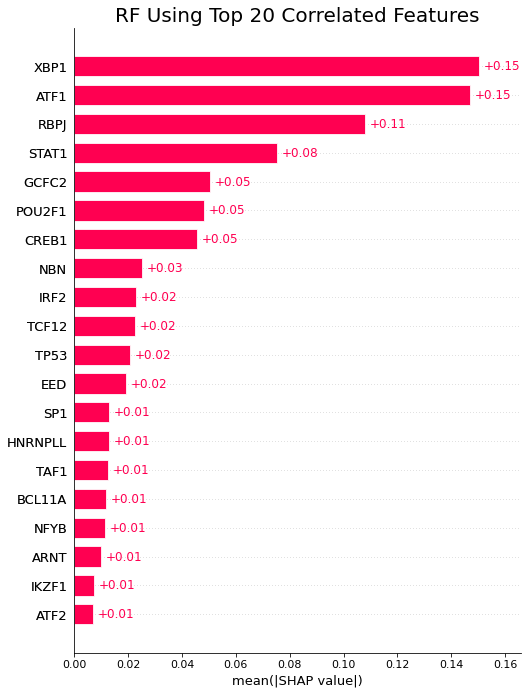

In [4]:
#corr RF
shapPlots("../models/RF_TOP20_CORR_PARAMS", "RF Using Top 20 Correlated Features", X_test_corr)

In [5]:
X_XGBperm_test = X_log_test[pd.read_csv('../summary/analysis/CD38_XGB_perm.csv').loc[:19, 'feature']]

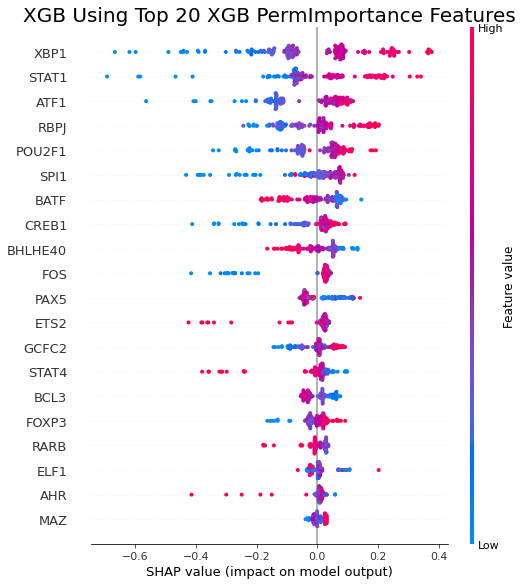

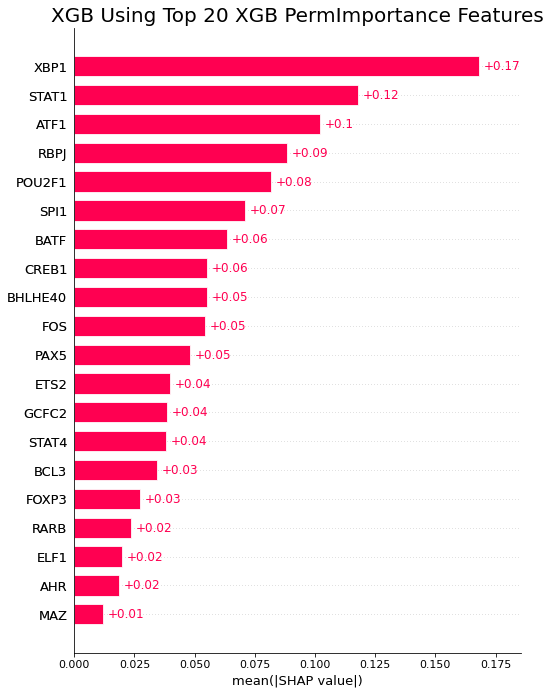

In [6]:
# xgb xgb perm importance
shapPlots("../models/XGB_TOP20_XGB_PERM_PARAMS", "XGB Using Top 20 XGB PermImportance Features", X_XGBperm_test)

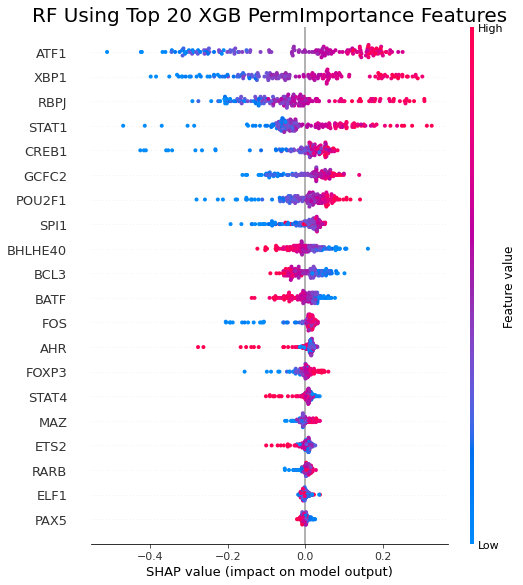

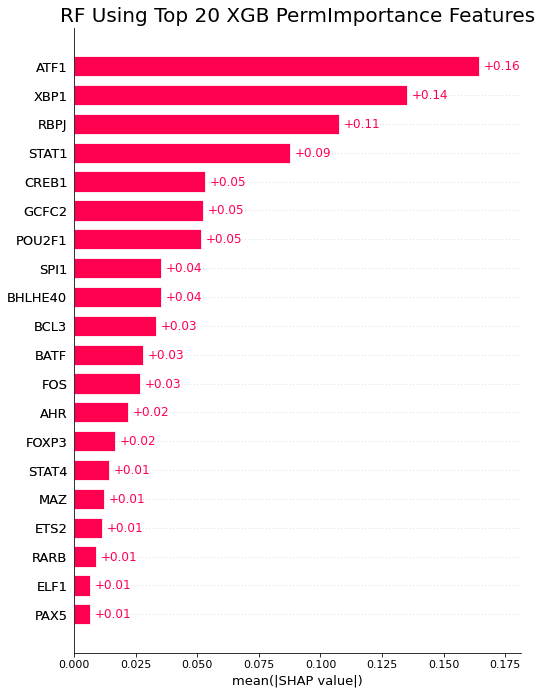

In [7]:
# rf xgb perm importance
shapPlots("../models/RF_TOP20_XGB_PERM_PARAMS", "RF Using Top 20 XGB PermImportance Features", X_XGBperm_test)

In [8]:
X_RFperm_test = X_log_test[pd.read_csv('../summary/analysis/CD38_RF_perm.csv').loc[:19, 'feature']]

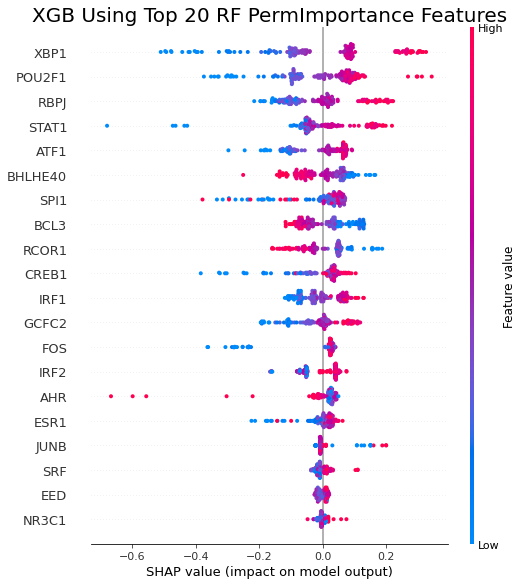

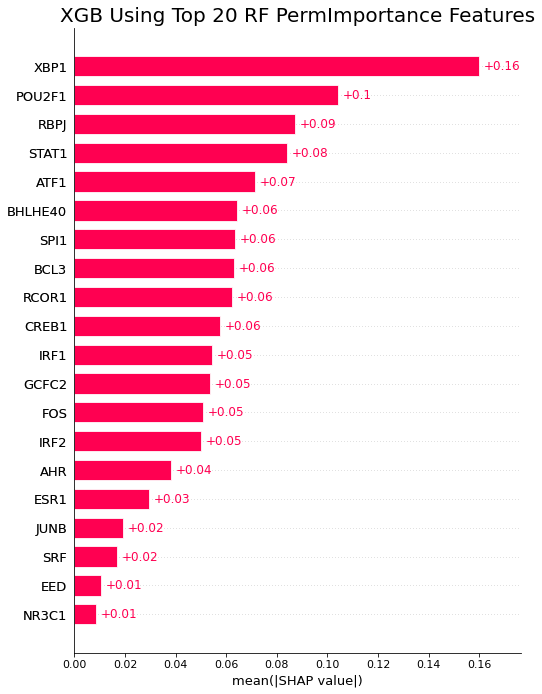

In [9]:
# xgb rf perm importance
shapPlots("../models/XGB_TOP20_RF_PERM_PARAMS", "XGB Using Top 20 RF PermImportance Features", X_RFperm_test)

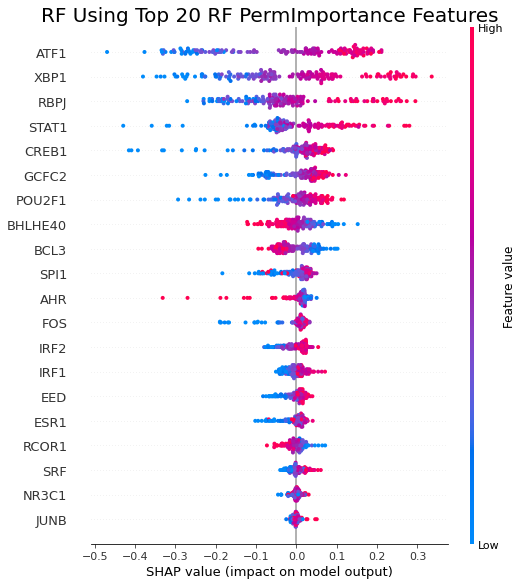

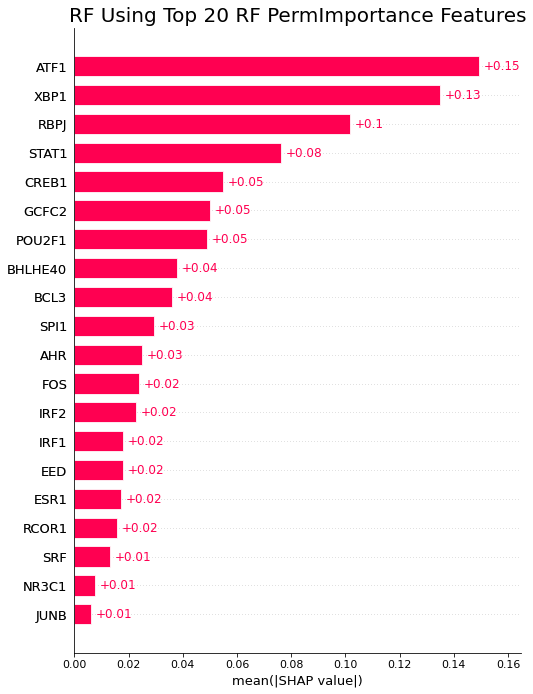

In [10]:
# rf rf perm importance
shapPlots("../models/RF_TOP20_RF_PERM_PARAMS", "RF Using Top 20 RF PermImportance Features", X_RFperm_test)

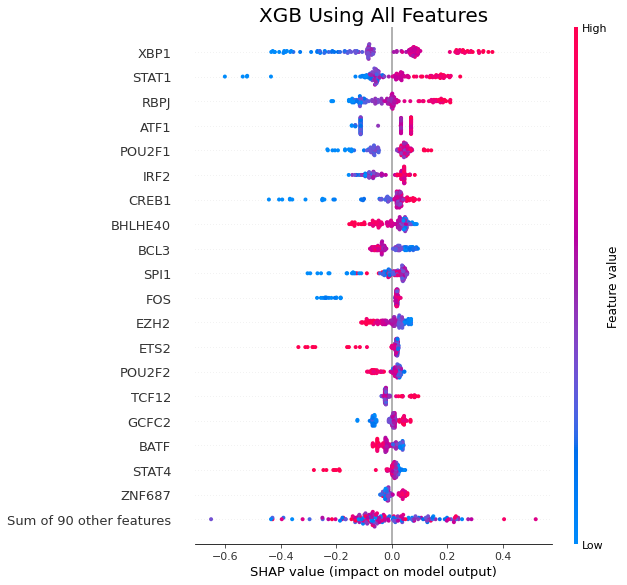

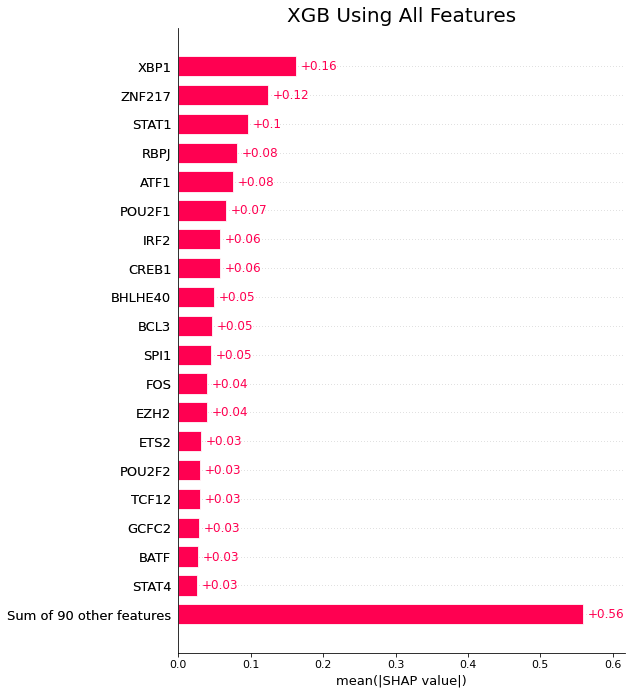

In [15]:
file = open('../models/XGB_ALL_PARAMS', 'rb')
model = pickle.load(file)
file.close()

title = 'XGB Using All Features'

explainer = shap.Explainer(model.best_estimator_)
shap_values = explainer(X_log_test)

shap.plots.beeswarm(shap_values, max_display = 20, show = False)
plt.title(title, size = 20)
plt.savefig('../summary/figures/' + title + ' SHAP Beeswarm Plot')
plt.show()

shap.plots.bar(shap_values, max_display = 20, show = False)
plt.title(title, size = 20)
plt.savefig('../summary/figures/' + title + ' SHAP Bar Plot')
plt.show()

In [13]:
xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.5658140364286011,
             colsample_bynode=0.8078536842438382,
             colsample_bytree=0.7051418651679482, gamma=0.7909390660598336,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.0968001207373439, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=183, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.8963379482245502, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [11]:
# xgb all params
shapPlots("../models/XGB_ALL_PARAMS", "XGB Using All Features", X_log_test)

Exception: The passed model is not callable and cannot be analyzed directly with the given masker! Model: RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fca2ed83340>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fca2e978e80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fca2c05ba90>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fca2bfe4040>},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error')

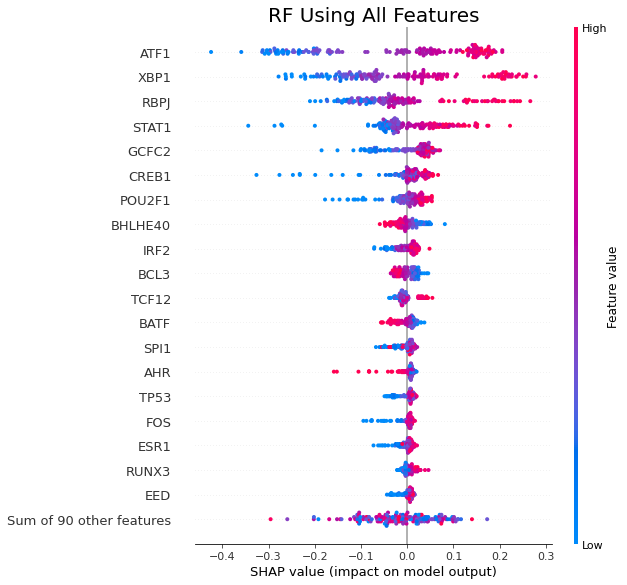

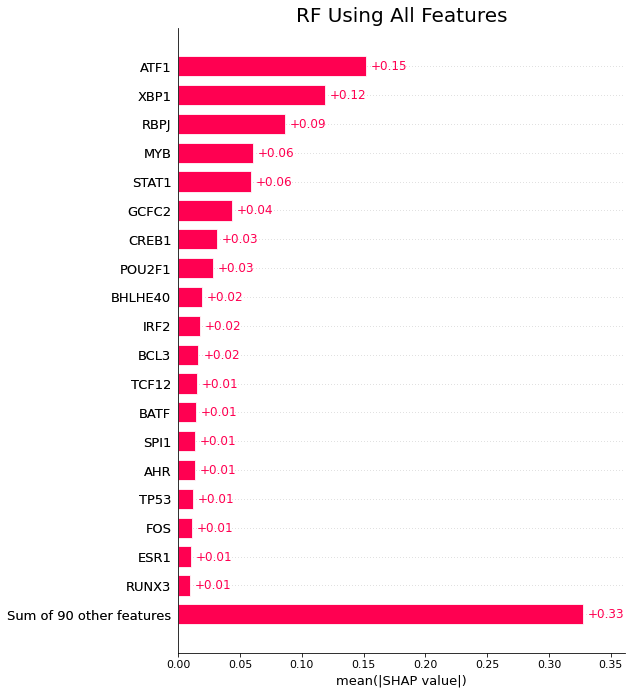

In [14]:
# rf all params
shapPlots("../models/RF_ALL_PARAMS", "RF Using All Features", X_log_test)

In [12]:
xgb_t20_corr_file = open("../models/XGB_ALL_PARAMS", 'rb')
xgb_t20_corr = pickle.load(xgb_t20_corr_file)
xgb_t20_corr_file.close()

In [17]:
xgb_t20_corr.predict(X_log_test)

array([14.432469 , 14.533019 , 14.7895355, 13.740827 , 13.185645 ,
       14.042011 , 14.540283 , 14.217397 , 13.946667 , 13.701118 ,
       13.566476 , 14.162735 , 14.090037 , 14.60593  , 14.56362  ,
       13.260345 , 13.82687  , 14.908058 , 13.7217655, 12.832927 ,
       14.180549 , 13.21411  , 13.680912 , 12.829219 , 14.78644  ,
       13.350705 , 14.106284 , 13.286038 , 14.418889 , 14.088535 ,
       13.485213 , 14.368232 , 14.397184 , 14.078307 , 14.148258 ,
       13.841928 , 14.043212 , 12.824307 , 13.857432 , 13.733215 ,
       14.465572 , 14.0068245, 13.762037 , 13.56782  , 14.509698 ,
       12.271497 , 13.223504 , 14.335503 , 13.429578 , 14.645818 ,
       14.239499 , 15.030269 , 13.059606 , 14.481221 , 14.151767 ,
       13.168919 , 14.81448  , 12.86795  , 14.992467 , 14.545118 ,
       14.736505 , 15.163993 , 14.414186 , 14.277009 , 14.767978 ,
       13.85052  , 13.965521 , 13.861588 , 15.275946 , 13.895501 ,
       13.323215 , 14.245929 , 13.772742 , 14.154827 , 15.2726

In [15]:
help(xgb_t20_corr)

Help on RandomizedSearchCV in module sklearn.model_selection._search object:

class RandomizedSearchCV(BaseSearchCV)
 |  RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)
 |  
 |  Randomized search on hyper parameters.
 |  
 |  RandomizedSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated search over parameter settings.
 |  
 |  In contrast to GridSearchCV, not all parameter values are tried out, but
 |  rather a fixed number of parameter settings is sampled from the specified
 |  distributions. The number of parameter settings that are tried is
 | 

In [3]:
xgb_t20_corr_file = open("../models/XGB_TOP20_CORR_PARAMS", 'rb')
xgb_t20_corr = pickle.load(xgb_t20_corr_file)
xgb_t20_corr_file.close()

Text(0.5, 1.0, 'SHAP values ')

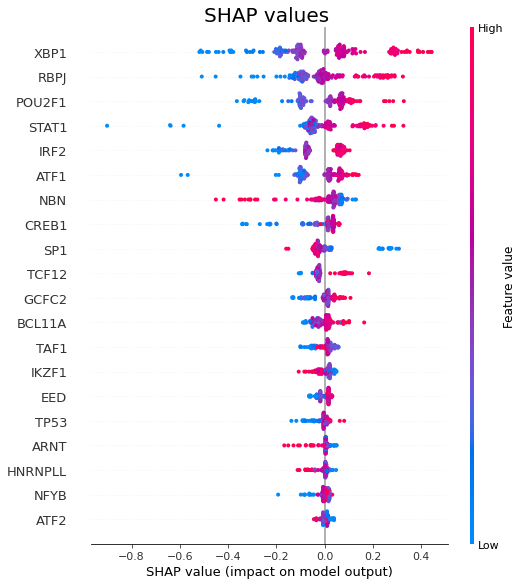

In [4]:
# !# Create object that can calculate shap values
explainer = shap.Explainer(xgb_t20_corr)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer(X_test_corr)

shap.plots.beeswarm(shap_values, max_display = 20, show = False)
plt.title('SHAP values', size = 20)
# plt.savefig('test')

Text(0.5, 1.0, 'SHAP values')

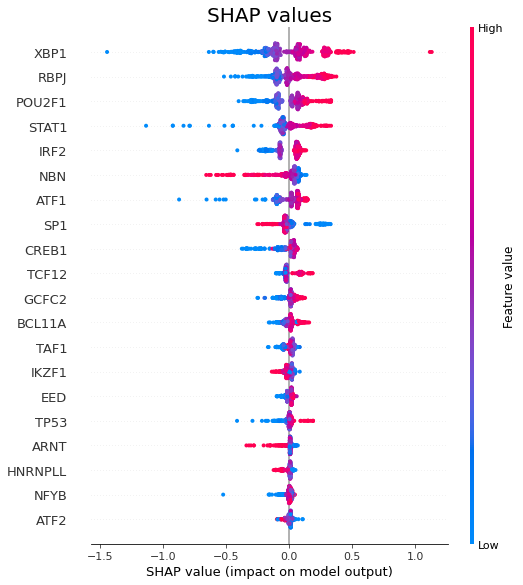

In [17]:
shap_values = explainer(X_train_corr)

shap.plots.beeswarm(shap_values, max_display = 20, show = False)
plt.title('SHAP values', size = 20)
# plt.savefig('test')

In [5]:
help(shap.plots.beeswarm)

Help on function beeswarm in module shap.plots._beeswarm:

beeswarm(shap_values, max_display=10, order=shap.Explanation.abs.mean(0), clustering=None, cluster_threshold=0.5, color=None, axis_color='#333333', alpha=1, show=True, log_scale=False, color_bar=True, plot_size='auto', color_bar_label='Feature value')
    Create a SHAP beeswarm plot, colored by feature values when they are provided.
    
    Parameters
    ----------
    shap_values : Explanation
        This is an Explanation object containing a matrix of SHAP values (# samples x # features).
    
    max_display : int
        How many top features to include in the plot (default is 20, or 7 for interaction plots)
    
    plot_size : "auto" (default), float, (float, float), or None
        What size to make the plot. By default the size is auto-scaled based on the number of
        features that are being displayed. Passing a single float will cause each row to be that 
        many inches high. Passing a pair of floats will 

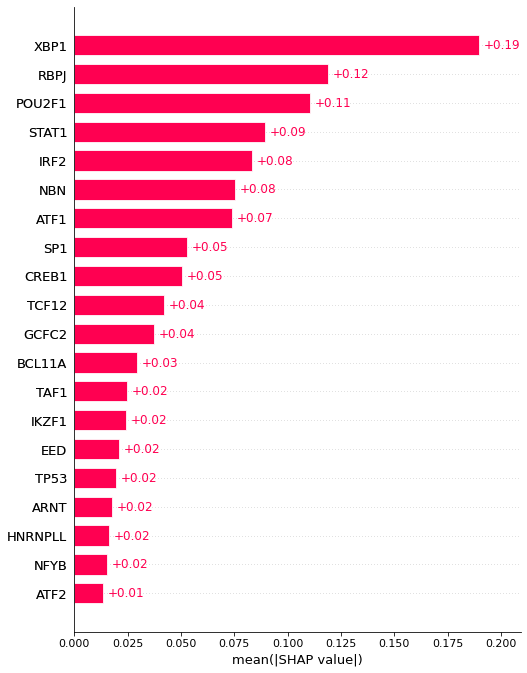

In [18]:
shap.plots.bar(shap_values, max_display = 20, show = False)
plt.savefig('test')

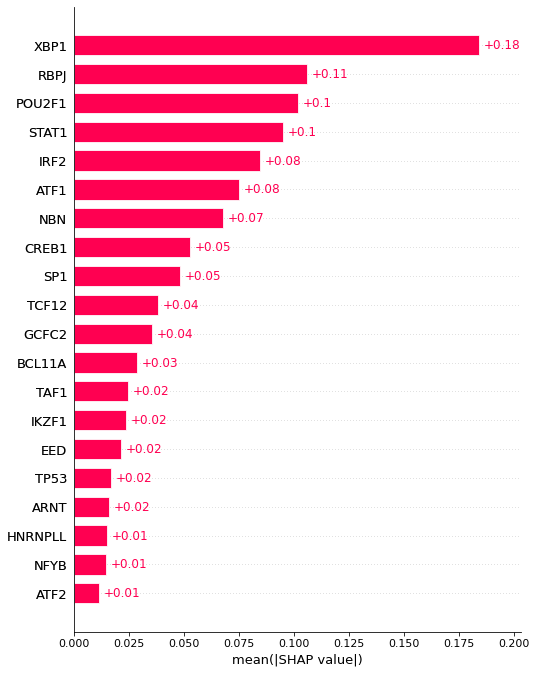

In [15]:
shap.plots.bar(shap_values, max_display = 20, show = False)
plt.savefig('test')

In [21]:
shap_values[0][]

.values =
array([-2.0567963e-02, -3.9593661e-01,  5.8192711e-02, -2.0859890e-01,
        2.5495162e-02,  4.7371194e-02,  2.2241530e-01, -1.9433340e-02,
       -3.0053854e-02,  1.5599681e-01,  2.2262517e-02,  1.8720701e-04,
        4.3966606e-02, -1.3199198e-01, -4.2362139e-05,  6.9544041e-03,
        2.7980894e-02,  8.3717614e-02, -6.3599549e-02, -4.8215935e-01],
      dtype=float32)

.base_values =
14.150723

.data =
array([ 9.70217269, 14.81763325, 10.86573327,  9.39231742, 11.71681946,
       11.66088727, 13.03548645, 12.40912571,  9.84862294, 15.09036057,
       12.0317012 , 11.85681455, 11.69827058, 13.21158415, 10.94690627,
       12.56462586, 10.40939094, 12.45943162, 12.06339508, 12.9275928 ])

In [28]:
import os

os.listdir('../models/')
os.fsdecode(os.listdir('../models/')[0])
file = open(os.path.join('../models/', os.fsdecode(os.listdir('../models/')[0])), 'rb')
xgb = pickle.load(file)
file.close()

# directory = os.fsencode('../models/')
    
for file in os.listdir('../models/'):
    filename = os.fsdecode(file)
    print(type(filename))
    print(os.path.join('../models/', filename))
    
# #      if filename.endswith(".asm") or filename.endswith(".py"): 
# #          # print(os.path.join(directory, filename))
# #          continue
#      else:
#          continue

<class 'str'>
../models/XGB_TOP20_XGB_PERM_PARAMS
<class 'str'>
../models/RF_TOP20_CORR_PARAMS
<class 'str'>
../models/XGB_TOP20_CORR_PARAMS
<class 'str'>
../models/XGB_TOP20_RF_PERM_PARAMS
<class 'str'>
../models/RF_TOP20_XGB_PERM_PARAMS
<class 'str'>
../models/RF_ALL_PARAMS
<class 'str'>
../models/XGB_ALL_PARAMS
<class 'str'>
../models/RF_TOP20_RF_PERM_PARAMS


In [8]:
xgb_t20_corr

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.5658140364286011,
             colsample_bynode=0.8078536842438382,
             colsample_bytree=0.7051418651679482, gamma=0.7909390660598336,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.0968001207373439, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=183, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.8963379482245502, tree_method='exact',
             validate_parameters=1, verbosity=None)